In [2]:
# project credit card 
# Mr NACHI Sofiane 
# In this hands-on project, we will develop a deep learning classification model to predict credit card fraud. 
#This project works to solve binary classification problems,one of the fundamental tasks in machine learning and deep learning.


In [3]:
# 1. Environment Setup
import os  
import sys
from pprint import pprint                     
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"

import numpy as np
import pandas as pd

# Import sympy of symbolic python
import sympy as sp

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

print("="*72)

%reload_ext watermark
%watermark -a "NACHI S" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)
 
# Configuration
from pathlib import Path
import pandas as pd

print("="*72)

# Configuration
DATA_PATH = Path('C:/Users/Me/Downloads/creditcard.csv.zip')

# Check if the file exists
if DATA_PATH.exists():
    # Load the CSV from the ZIP file
    df = pd.read_csv(DATA_PATH, compression='zip')

    
# Check the Data Info
    print(df.info())
    print(df.head())
# Check class distribution
print(df['Class'].value_counts())
    


Author: NACHI S

Last updated: 2025-01-28

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Imported Packages and Their Versions:
tensorflow: 2.15.1
pandas    : 2.2.3
sklearn   : 1.6.0
numpy     : 1.26.4
sympy     : 1.13.3
sys       : 3.9.21 | packaged by conda-forge | (main, Dec  5 2024, 13:41:22) [MSC v.1929 64 bit (AMD64)]
keras     : 2.15.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V

In [4]:

print(df.shape)

(284807, 31)


In [14]:
# Quick look at the data
print("Dataset Shape:", X.shape)
print("\nFeatures:")
print(X.describe())

Dataset Shape: (284807, 30)

Features:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std

In [5]:
# Split features and labels
X = df.drop(columns=['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [6]:
# ==================================================== #
#        Model Definition and Compilation
# ==================================================== #

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile with multiple metrics
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
# Accuracy : % prevision 
# Precision : %  prevision positif 
# Recall : % capacity detection fraud 
# AUC : capacity classification 
# application callbacks & save best model with chekpoint 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint('best_model.PRJ', 
                                      monitor='val_loss', 
                                      save_best_only=True, 
                                      verbose=1)

# Define the early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # تتبع الخسارة على بيانات ---التحقق
    patience=3,  # عدد الدورات التي يجب أن تنتظرها-- قبل التوقف
    restore_best_weights=True  # استعادة الأوزان من أفضل نقطة
)

# تدريب النموذج مع إضافة الـ callbacks
history = model.fit(
    X_train_scaled, y_train,  # بيانات التدريب
    validation_data=(X_test_scaled, y_test),  # بيانات التحقق
    epochs=50,  # عدد الدورات
    batch_size=32,  # حجم دفعة
    callbacks=[checkpoint_callback, early_stopping_callback]  # إضافة الـ callbacks
)



Epoch 1/50


7104/7121 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9987 - precision: 0.6049 - recall: 0.6972 - auc: 0.9085
Epoch 1: val_loss improved from inf to 0.00309, saving model to best_model.PRJ
INFO:tensorflow:Assets written to: best_model.PRJ\assets


INFO:tensorflow:Assets written to: best_model.PRJ\assets


7121/7121 [==============================] - 19s 2ms/step - loss: 0.0070 - accuracy: 0.9987 - precision: 0.6049 - recall: 0.6954 - auc: 0.9088 - val_loss: 0.0031 - val_accuracy: 0.9993 - val_precision: 0.9014 - val_recall: 0.6531 - val_auc: 0.9430
Epoch 2/50
7110/7121 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9994 - precision: 0.8678 - recall: 0.7665 - auc: 0.9446
Epoch 2: val_loss improved from 0.00309 to 0.00301, saving model to best_model.PRJ
INFO:tensorflow:Assets written to: best_model.PRJ\assets


INFO:tensorflow:Assets written to: best_model.PRJ\assets


7121/7121 [==============================] - 15s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - precision: 0.8678 - recall: 0.7665 - auc: 0.9446 - val_loss: 0.0030 - val_accuracy: 0.9994 - val_precision: 0.8039 - val_recall: 0.8367 - val_auc: 0.9484
Epoch 3/50
7098/7121 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994 - precision: 0.8634 - recall: 0.7557 - auc: 0.9522
Epoch 3: val_loss improved from 0.00301 to 0.00279, saving model to best_model.PRJ
INFO:tensorflow:Assets written to: best_model.PRJ\assets


INFO:tensorflow:Assets written to: best_model.PRJ\assets


7121/7121 [==============================] - 16s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - precision: 0.8638 - recall: 0.7563 - auc: 0.9523 - val_loss: 0.0028 - val_accuracy: 0.9994 - val_precision: 0.8163 - val_recall: 0.8163 - val_auc: 0.9487
Epoch 4/50
7101/7121 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994 - precision: 0.9006 - recall: 0.7628 - auc: 0.9535
Epoch 4: val_loss did not improve from 0.00279
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.9009 - recall: 0.7614 - auc: 0.9537 - val_loss: 0.0043 - val_accuracy: 0.9988 - val_precision: 0.6176 - val_recall: 0.8571 - val_auc: 0.9624
Epoch 5/50
7098/7121 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9995 - precision: 0.8902 - recall: 0.7837 - auc: 0.9638
Epoch 5: val_loss did not improve from 0.00279
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0023 - accuracy: 0.9995 - precision: 0.8902 

In [7]:
# ==================================================== #
#        Detailed History Object Analysis
# ==================================================== #

# Understanding the basic structure
print("Type of history object:", type(history))

# List history methods and attributes (properties)
print("\nHistory object attributes:\n",
      [att for att in dir(history) if not att.startswith('_')])

Type of history object: <class 'keras.src.callbacks.History'>

History object attributes:
 ['epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']


In [8]:
# Getting available metrics
print("\nHistory dictionary keys:", history.history.keys())


History dictionary keys: dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


In [9]:
# ==================================================== #
#        Analysis of Training History
# ==================================================== #
# Convert history to DataFrame for easy analysis
history_df = pd.DataFrame(history.history)
print(history_df.head(3))

       loss  accuracy  precision    recall       auc  val_loss  val_accuracy  \
0  0.006986  0.998688   0.604856  0.695431  0.908772  0.003089      0.999280   
1  0.003083  0.999394   0.867816  0.766497  0.944619  0.003013      0.999368   
2  0.002748  0.999372   0.863768  0.756345  0.952336  0.002787      0.999368   

   val_precision  val_recall   val_auc  
0       0.901408    0.653061  0.943037  
1       0.803922    0.836735  0.948381  
2       0.816327    0.816327  0.948665  


In [10]:
# print the epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5]


In [11]:
# Add epoch numbers
history_df['epoch'] = [history.epoch[i] + 1 for i in range(len(history_df)) ]

print(history_df.head())

       loss  accuracy  precision    recall       auc  val_loss  val_accuracy  \
0  0.006986  0.998688   0.604856  0.695431  0.908772  0.003089      0.999280   
1  0.003083  0.999394   0.867816  0.766497  0.944619  0.003013      0.999368   
2  0.002748  0.999372   0.863768  0.756345  0.952336  0.002787      0.999368   
3  0.002594  0.999443   0.900901  0.761421  0.953718  0.004265      0.998841   
4  0.002341  0.999456   0.890173  0.781726  0.962631  0.002807      0.999421   

   val_precision  val_recall   val_auc  epoch  
0       0.901408    0.653061  0.943037      1  
1       0.803922    0.836735  0.948381      2  
2       0.816327    0.816327  0.948665      3  
3       0.617647    0.857143  0.962445      4  
4       0.815534    0.857143  0.953449      5  


In [12]:
# Find best epochs for different metrics
best_acc_epoch = history_df['val_accuracy'].idxmax() + 1
best_loss_epoch = history_df['val_loss'].idxmin() + 1

print("\nBest Performance:")
print(f"Best validation accuracy at epoch {best_acc_epoch}")
print(f"Best validation loss at epoch {best_loss_epoch}")


Best Performance:
Best validation accuracy at epoch 6
Best validation loss at epoch 3


Index(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss',
       'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'epoch'],
      dtype='object')


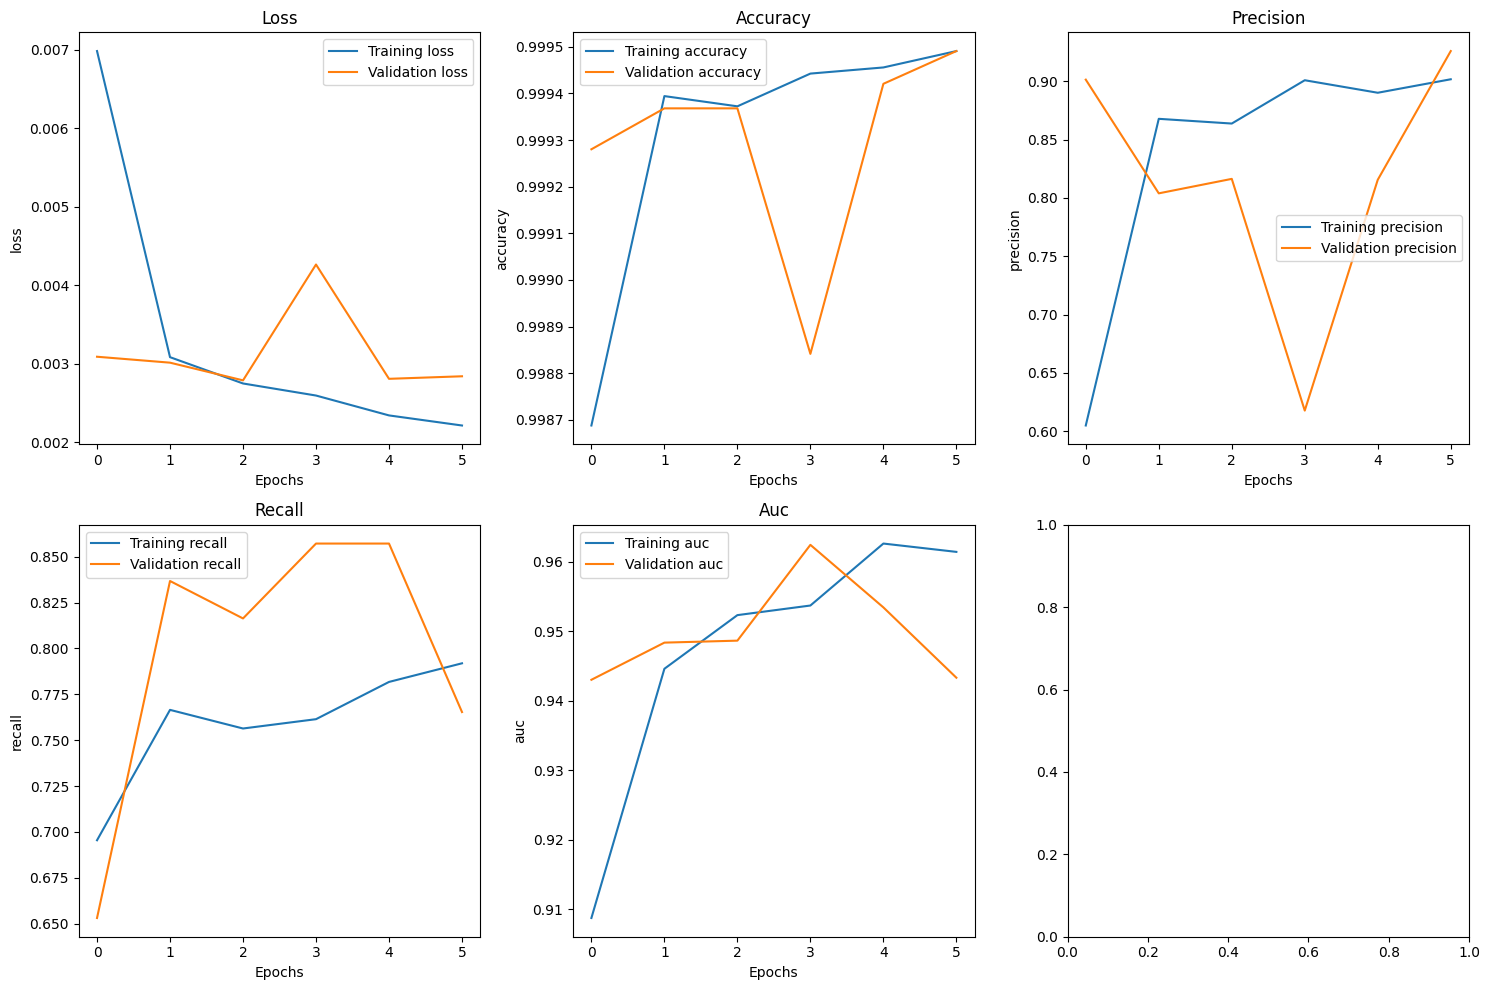

In [13]:
import matplotlib.pyplot as plt

# التحقق من الأعمدة المتوفرة
print(history_df.columns)

# قائمة المقاييس بناءً على الأعمدة المتوفرة
metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc']  # قم بالتأكد من وجود هذه القيم

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    if metric in history_df.columns:  # التحقق من وجود المقياس
        axes[idx].plot(history_df[metric], label=f'Training {metric}')
        axes[idx].plot(history_df[f'val_{metric}'], label=f'Validation {metric}')
        axes[idx].set_title(metric.capitalize())
        axes[idx].legend()
        axes[idx].set_xlabel('Epochs')
        axes[idx].set_ylabel(metric)

plt.tight_layout()
plt.show()
